<div style="background-color: white; padding: 25px; border-radius: 12px; box-shadow: 0 0 10px rgba(0,0,0,0.08); font-family: Arial, sans-serif; color: #333;">


 <h1 style="font-size: 2.6em; color: #FF5733; border-bottom: 4px solid #C70039; padding-bottom: 15px; margin-bottom: 30px; font-weight: 700; text-shadow: 1px 1px 2px rgba(0,0,0,0.1);">
    1. Introduction and Objectives
  </h1>
  <p style="line-height: 1.7;">
    The primary objective of this <strong>Exploratory Data Analysis (EDA)</strong> is to gain a comprehensive understanding of the <strong>NYC Airbnb rental market</strong>. This analysis aims to uncover patterns, trends, and relationships within the listing data to guide insights related to:
  </p>

  <ul style="margin-left: 20px; line-height: 1.8;">
    <li>🏙️ The <strong>distribution of listings</strong> across different neighborhoods and room types.</li>
    <li>💰 Characteristics of listings based on <strong>pricing, availability</strong>, and <strong>minimum stay</strong> requirements.</li>
    <li>👤 Analysis of <strong>host activity</strong> and the influence of different <strong>host types</strong> on listing attributes.</li>
    <li>🌟 The impact of <strong>reviews</strong> on listing visibility, trust, and performance.</li>
    <li>🗺️ Geospatial exploration of listings across New York City to detect <strong>location-based patterns</strong>.</li>
  </ul>

  <p style="line-height: 1.7;">
    This analysis sets the foundation for deeper modeling or business decision-making regarding pricing, host management, and neighborhood-specific strategies.
  </p>

</div>


<div style="background-color: white; padding: 25px; border-radius: 12px; box-shadow: 0 0 10px rgba(0,0,0,0.08); font-family: Arial, sans-serif; color: #333;">
<h1 style="font-size: 2.6em; color: #FF5733; border-bottom: 4px solid #C70039; padding-bottom: 15px; margin-bottom: 30px; font-weight: 700; text-shadow: 1px 1px 2px rgba(0,0,0,0.1);">
    2. Data Overview (Summary Statistics & Data Types)
  </h1>


  <div style="border: 1px solid #ddd; border-radius: 8px; padding: 20px; margin-bottom: 20px;">
    <h3 style="color: #2e7d32; margin-bottom: 10px;">🔢 Data Types</h3>
    <p style="line-height: 1.7;">Ensure proper data type handling:</p>
    <ul style="margin-left: 20px; line-height: 1.8;">
      <li><strong>Numerical Columns:</strong> 
        <br>
        <em>id, host_id, latitude, longitude, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, price_per_night, seasonal_availability</em> — should be numeric (int/float).
      </li>
      <li><strong>Categorical Columns:</strong> 
        <br>
        <em>name, host_name, neighbourhood_group, neighbourhood, room_type, has_review, active_listing, is_entire_home</em> — should be object or category.
      </li>
      <li><strong>Date Column:</strong> 
        <br>
        <em>last_review</em> — ensure it's in <code>datetime</code> format if retained.
      </li>
    </ul>
  </div>

  <div style="border: 1px solid #ddd; border-radius: 8px; padding: 20px;">
    <h3 style="color: #2e7d32; margin-bottom: 10px;">📊 Summary Statistics</h3>

  <p style="line-height: 1.7;"><strong>For Numerical Columns:</strong></p>
    <ul style="margin-left: 20px; line-height: 1.8;">
      <li>Mean (Average)</li>
      <li>Median (50th percentile)</li>
      <li>Standard Deviation (spread of data)</li>
      <li>Minimum and Maximum values</li>
      <li>Quartiles (25th, 50th, 75th percentiles)</li>
    </ul>

  <p style="line-height: 1.7;"><strong>For Categorical Columns:</strong></p>
    <ul style="margin-left: 20px; line-height: 1.8;">
      <li>Number of unique values</li>
      <li>Most frequent category (mode)</li>
      <li>Frequency of the mode</li>
    </ul>
  </div>

</div>


<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #fefefe; color: #4A4A4A; line-height: 1.7; padding: 20px; border-radius: 8px; box-shadow: 0 4px 8px rgba(0,0,0,0.05); margin-top: 40px;">

  <h1 style="font-size: 2.6em; color: #FF5733; border-bottom: 4px solid #C70039; padding-bottom: 15px; margin-bottom: 30px; font-weight: 700; text-shadow: 1px 1px 2px rgba(0,0,0,0.1);">
    3. Univariate Analysis
  </h1>




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("AB_NYC_Featured.csv")

<h3 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:2.2em; color:#2E86C1; border-bottom:2px solid #1B4F72; padding-bottom:6px; margin-top:30px; margin-bottom:15px; font-weight:600;">
  3.1 Categorical Variables
</h3>

<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
   room_type Distribution:
</h4>


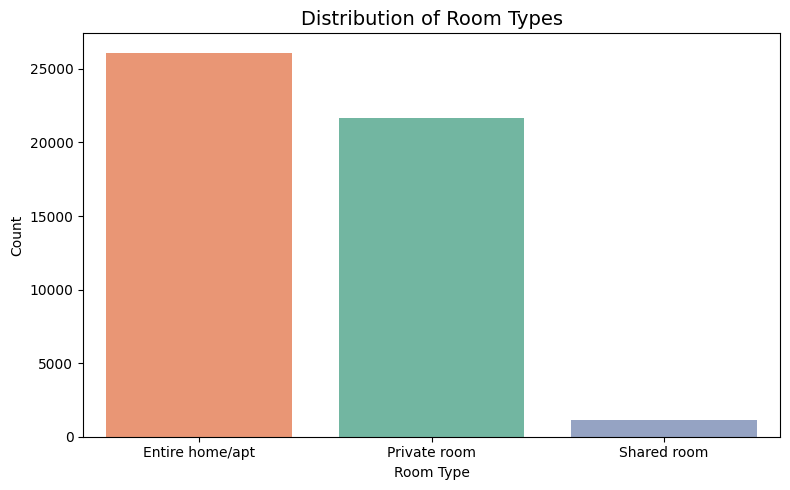

In [3]:
# Count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index,hue='room_type',legend=False, palette='Set2')
plt.title('Distribution of Room Types', fontsize=14)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<div style="border: 2px solid #ccc; border-radius: 12px; padding: 20px; margin: 20px 0; background-color: #fff; color: #222; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">
  <h3 style="text-decoration: underline; color: #007BFF; margin-bottom: 12px;">📊 Insight: Distribution of Room Types</h3>
  <p><span style="color: #28a745; font-weight: bold;">✔ Entire home/apt:</span> Most common room type with approximately <strong>26,000 listings</strong>. This indicates a strong preference for private stays.</p>
  <p><span style="color: #ffc107; font-weight: bold;">✔ Private room:</span> Second most common with around <strong>21,500 listings</strong>. Suitable for budget-conscious travelers.</p>
  <p><span style="color: #dc3545; font-weight: bold;">✔ Shared room:</span> Least preferred with only <strong>~1,000 listings</strong>. Shows very low demand.</p>
  <p>🔍 <strong>Conclusion:</strong> There’s a clear inclination towards privacy, making entire apartments the top choice among users.</p>
</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
   Neighbourhood Group Distribution:
</h4>

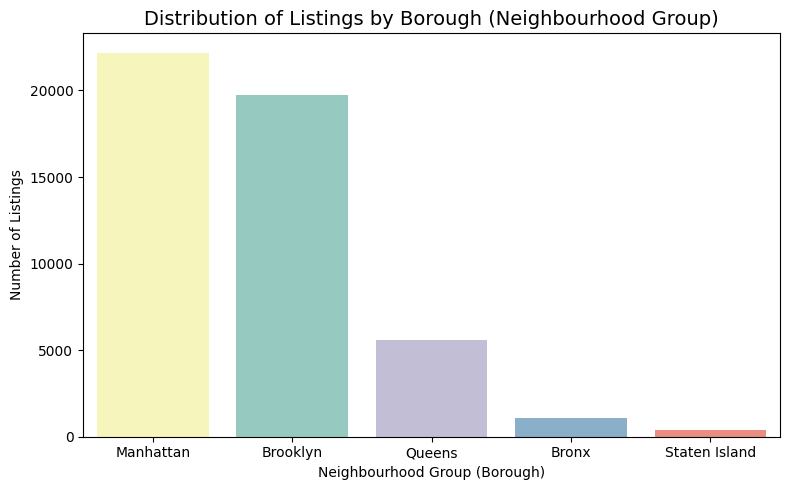

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index,hue='neighbourhood_group',legend=False, palette='Set3')
plt.title('Distribution of Listings by Borough (Neighbourhood Group)', fontsize=14)
plt.xlabel('Neighbourhood Group (Borough)')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<div style="border: 2px solid #bbb; border-radius: 12px; padding: 20px; margin: 20px 0; background-color: #e6f0ff; color: #222; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">
  <h3 style="margin-bottom: 12px;">🏙️ <u>Insight: Listings by Borough (Neighbourhood Group)</u></h3>
  <p><strong>📊 Manhattan:</strong> ~22,000 listings — highest in the city.</p>
  <p><strong>📊 Brooklyn:</strong> ~19,500 listings — second highest.</p>
  <p><strong>📉 Queens:</strong> ~5,500 listings — significantly lower.</p>
  <p><strong>📉 Bronx:</strong> ~1,000 listings — very few.</p>
  <p><strong>📉 Staten Island:</strong> <500 listings — the least overall.</p>
  <p>🧠 <strong>Conclusion:</strong> <span style="color: #007BFF;">Manhattan</span> and <span style="color: #007BFF;">Brooklyn</span> dominate, while others contribute much less.</p>
</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
   Neighbourhood Distribution:
</h4>

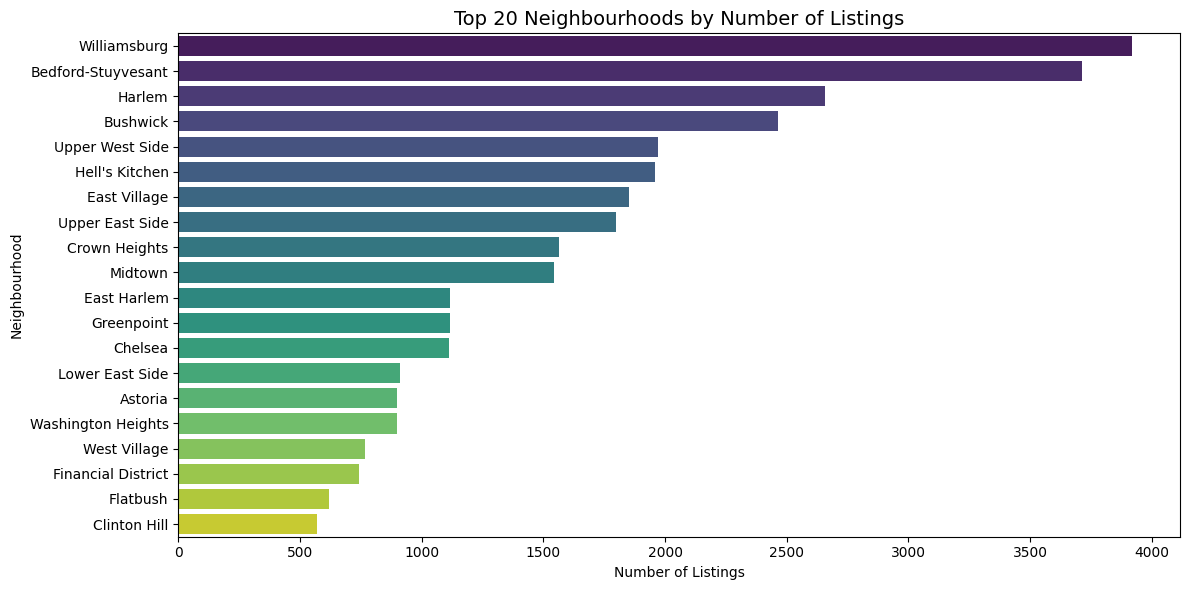

In [5]:
plt.figure(figsize=(12, 6))
top_neigh = df['neighbourhood'].value_counts().head(20)

sns.barplot(x=top_neigh.values, y=top_neigh.index,hue=top_neigh.index,legend=False, palette='viridis')
plt.title('Top 20 Neighbourhoods by Number of Listings', fontsize=14)
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.tight_layout()
plt.show()


<div style="border: 2px solid #bbb; border-radius: 12px; padding: 20px; margin: 20px 0; background-color: #fff9e6; color: #222; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">
  <h3 style="margin-bottom: 12px; color: #e67e22;">🏘️ <u>Insight: Top 20 Neighbourhoods by Number of Listings</u></h3>
  
  <p>This horizontal bar chart displays the <strong>Top 20 Neighbourhoods</strong> based on the number of listings, sorted in descending order.</p>
  
  <ul style="margin-top: 10px;">
    <li><strong>🏆 Williamsburg</strong>: ~3,900 listings (highest)</li>
    <li><strong>🥈 Bedford-Stuyvesant</strong>: ~3,700 listings</li>
    <li><strong>🥉 Harlem</strong>: ~2,600 listings</li>
    <li>📍 <strong>Bushwick</strong>: ~2,450 listings</li>
    <li>📍 <strong>Upper West Side</strong>: ~1,900 listings</li>
    <li>📍 <strong>Hell's Kitchen</strong> & <strong>East Village</strong>: ~1,850 listings each</li>
    <li>📍 <strong>Upper East Side</strong>: ~1,750 listings</li>
    <li>📍 <strong>Crown Heights</strong> & <strong>Midtown</strong>: ~1,500 listings</li>
    <li>⬇️ The rest (from <strong>East Harlem</strong> to <strong>Clinton Hill</strong>) have fewer than 1,500 listings, with <strong>Clinton Hill</strong> just over 500.</li>
  </ul>

  <p style="margin-top: 12px;">🔍 <strong>Observation:</strong> Listings are highly concentrated in a few neighborhoods like <span style="color: #d35400;"><strong>Williamsburg</strong></span> and <span style="color: #d35400;"><strong>Bedford-Stuyvesant</strong></span>, while others trail behind.</p>
</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
   has_review Distribution:
</h4>

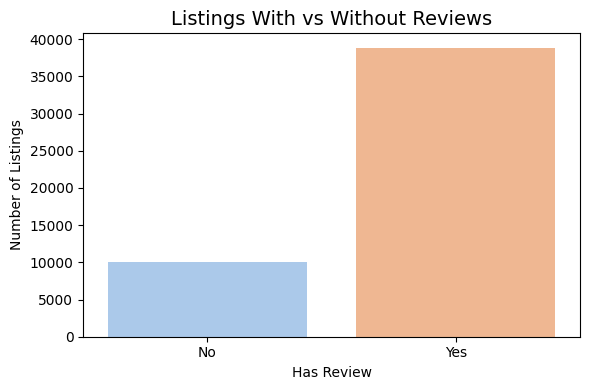

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='has_review',hue='has_review',legend=False, palette='pastel')

plt.title('Listings With vs Without Reviews', fontsize=14)
plt.xlabel('Has Review')
plt.ylabel('Number of Listings')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


<div style="border: 2px solid #bbb; border-radius: 12px; padding: 20px; margin: 20px 0; background-color: #e6ffe6; color: #222; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">
  <h3 style="margin-bottom: 12px; color: #27ae60;">🧾 <u>Insight: Listings With vs Without Reviews</u></h3>

  <p>This bar chart titled <strong>"Listings With vs Without Reviews"</strong> compares the number of listings that have reviews to those that do not.</p>

  <ul style="margin-top: 10px;">
    <li>📌 <strong>No (Has Review = No):</strong> ~10,000 listings do <strong>not</strong> have reviews.</li>
    <li>📌 <strong>Yes (Has Review = Yes):</strong> ~39,000 listings <strong>do</strong> have reviews.</li>
  </ul>

  <p style="margin-top: 12px;">📊 <strong>Observation:</strong> A significantly larger number of listings have reviews compared to those without. This suggests active user engagement and possibly more trustworthy listings.</p>
</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
   active_listing Distribution:
</h4>

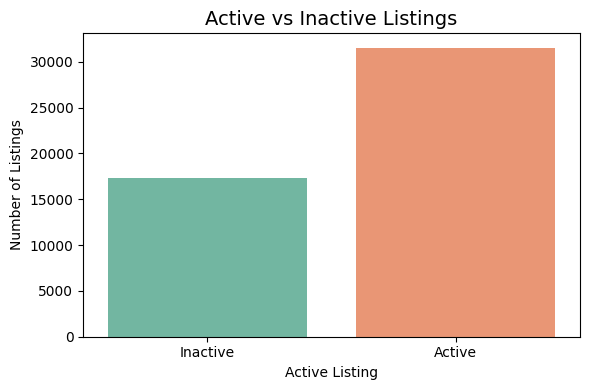

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='active_listing',hue='active_listing',legend=False, palette='Set2')

plt.title('Active vs Inactive Listings', fontsize=14)
plt.xlabel('Active Listing')
plt.ylabel('Number of Listings')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.tight_layout()
plt.show()


<div style="border: 2px solid #bbb; border-radius: 12px; padding: 20px; margin: 20px 0; background-color: #e6f0ff; color: #222; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">
  <h3 style="margin-bottom: 12px; color: #2980b9;">📍 <u>Insight: Active vs Inactive Listings</u></h3>

  <p>This bar chart titled <strong>"Active vs Inactive Listings"</strong> compares the number of active listings to inactive listings.</p>

  <ul style="margin-top: 10px;">
    <li>📌 <strong>Inactive Listings:</strong> ~17,000 listings are <strong>inactive</strong>.</li>
    <li>📌 <strong>Active Listings:</strong> ~31,500 listings are <strong>active</strong>.</li>
  </ul>

  <p style="margin-top: 12px;">📊 <strong>Observation:</strong> There are significantly more active listings than inactive ones, indicating a dynamic and currently engaged listing environment.</p>
</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
   is_entire_home Distribution:
</h4>

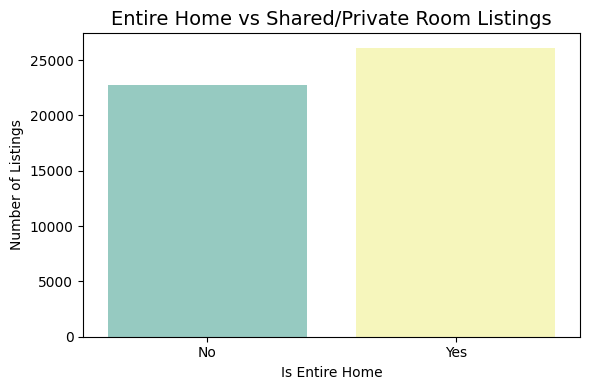

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_entire_home',hue='is_entire_home',legend=False, palette='Set3')

plt.title('Entire Home vs Shared/Private Room Listings', fontsize=14)
plt.xlabel('Is Entire Home')
plt.ylabel('Number of Listings')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


<div style="border: 2px solid #bbb; border-radius: 12px; padding: 20px; margin: 20px 0; background-color: #fff3e6; color: #222; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">
  <h3 style="margin-bottom: 12px; color: #d35400;">🏠 <u>Insight: Entire Home vs Shared/Private Room Listings</u></h3>

  <p>This bar chart titled <strong>"Entire Home vs Shared/Private Room Listings"</strong> compares the number of listings that are entire homes to those that are shared or private rooms.</p>

  <ul style="margin-top: 10px;">
    <li>📌 <strong>No (Shared/Private Rooms):</strong> ~22,800 listings are <strong>shared or private rooms</strong>.</li>
    <li>📌 <strong>Yes (Entire Homes):</strong> ~26,000 listings are <strong>entire homes</strong>.</li>
  </ul>

  <p style="margin-top: 12px;">📊 <strong>Observation:</strong> There are slightly more <strong>entire home listings</strong> than shared or private room listings, suggesting a preference toward full-space rentals.</p>
</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
   name & host_name
</h4>

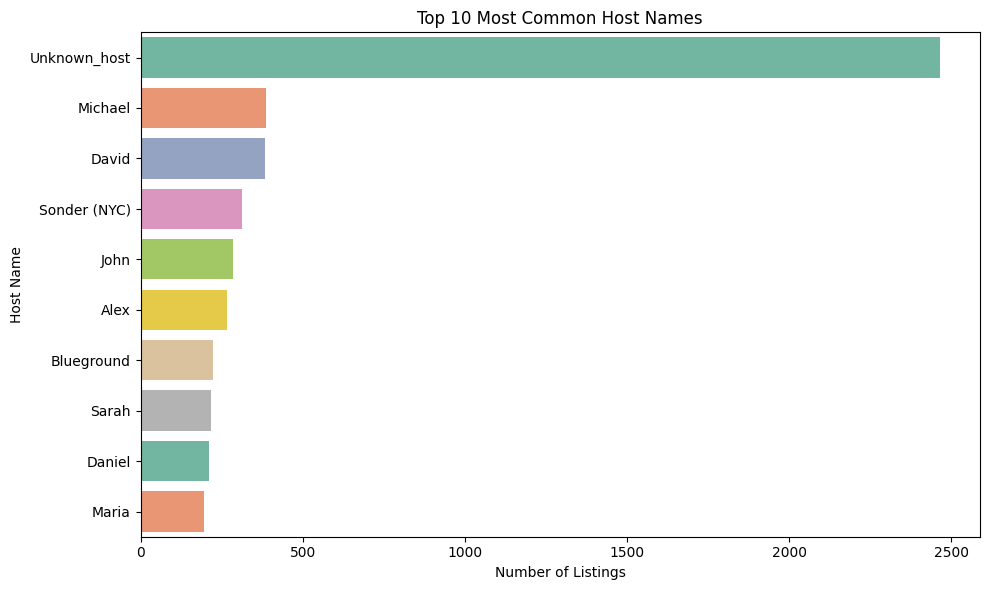

In [9]:
top_host_names = df['host_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_host_names.values, y=top_host_names.index,hue=top_host_names.index,legend=False, palette='Set2')
plt.title('Top 10 Most Common Host Names')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()



<!-- Insight: Top 10 Most Common Host Names -->
<div style="border-radius: 14px; border: 1px solid #ccc; background: #fff5f0; padding: 20px; font-family: 'Segoe UI', sans-serif; color: #333;">
  <h3 style="background: linear-gradient(to right, #f857a6, #ff5858); color: white; padding: 10px 15px; border-radius: 10px 10px 0 0;">🧑‍💼 Top 10 Most Common Host Names</h3>

  <p>This horizontal bar chart shows the <strong>10 most frequently occurring host names</strong> and their corresponding number of listings.</p>

  <ul style="margin-top: 15px; line-height: 1.7;">
    <li>❓ <strong>Unknown_host</strong>: ~2,450 listings</li>
    <li>👤 <strong>Michael</strong>: ~400 listings</li>
    <li>👤 <strong>David</strong>: ~370 listings</li>
    <li>🏢 <strong>Sonder (NYC)</strong>: ~300 listings</li>
    <li>👤 <strong>John</strong>: ~280 listings</li>
    <li>👤 <strong>Alex</strong>: ~250 listings</li>
    <li>🏢 <strong>Blueground</strong>: ~180 listings</li>
    <li>👩 <strong>Sarah</strong>: ~160 listings</li>
    <li>👨 <strong>Daniel</strong>: ~140 listings</li>
    <li>👩 <strong>Maria</strong>: ~110 listings</li>
  </ul>

  <p style="margin-top: 15px;">📌 <strong>Observation:</strong> <em>Unknown_host</em> is significantly more common than any individual name, possibly indicating anonymized or missing data. Several entries like “Sonder (NYC)” and “Blueground” point to commercial or property management listings.</p>
</div>

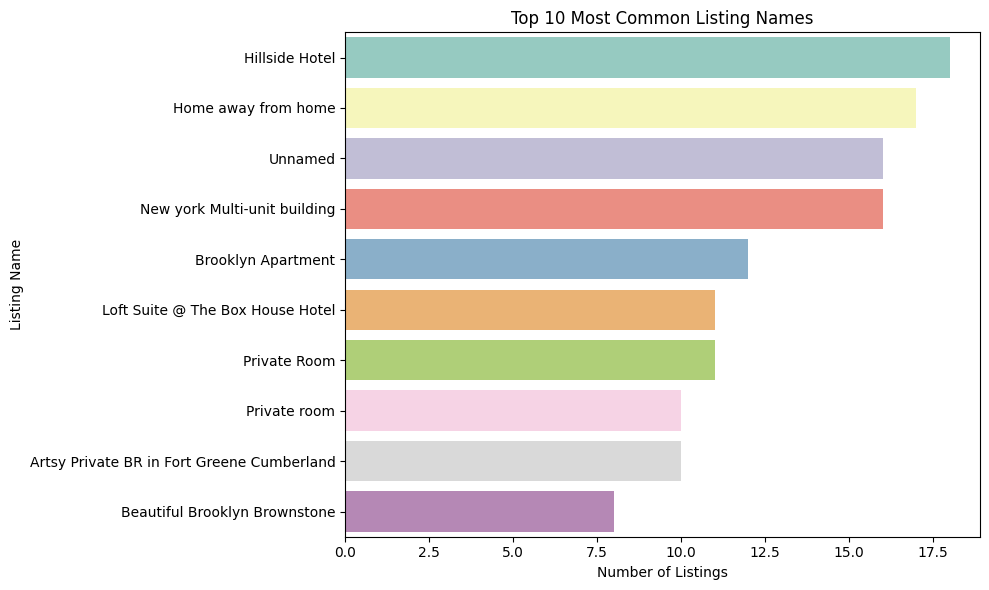

In [10]:
# Top 10 listing names
top_listing_names = df['name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_listing_names.values, y=top_listing_names.index,hue=top_listing_names.index,legend=False, palette='Set3')
plt.title('Top 10 Most Common Listing Names')
plt.xlabel('Number of Listings')
plt.ylabel('Listing Name')
plt.tight_layout()
plt.show()

<!-- Insight: Top 10 Most Common Listing Names -->
<div style="border-radius: 14px; border: 1px solid #ccc; background: #f0f8ff; padding: 20px; margin-bottom: 25px; font-family: 'Segoe UI', sans-serif; color: #333;">
  <h3 style="background: linear-gradient(to right, #36d1dc, #5b86e5); color: white; padding: 10px 15px; border-radius: 10px 10px 0 0;">🔤 Top 10 Most Common Listing Names</h3>

  <p>This horizontal bar chart displays the <strong>10 most frequently occurring listing names</strong> along with the number of listings using each name.</p>

  <ul style="margin-top: 15px; line-height: 1.7;">
    <li>🏨 <strong>Hillside Hotel</strong>: ~17.8 listings</li>
    <li>🏡 <strong>Home away from home</strong>: ~16.5 listings</li>
    <li>❓ <strong>Unnamed</strong>: ~15.8 listings</li>
    <li>🏙️ <strong>New York Multi-unit building</strong>: ~15.5 listings</li>
    <li>🛏️ <strong>Brooklyn Apartment</strong>: ~11.9 listings</li>
    <li>🧳 <strong>Loft Suite @ The Box House Hotel</strong>: ~10.8 listings</li>
    <li>🚪 <strong>Private Room</strong>: ~10.5 listings</li>
    <li>🚪 <strong>Private room</strong>: ~9.8 listings</li>
    <li>🎨 <strong>Artsy Private BR in Fort Greene Cumberland</strong>: ~9.3 listings</li>
    <li>🏠 <strong>Beautiful Brooklyn Brownstone</strong>: ~7.9 listings</li>
  </ul>

  <p style="margin-top: 15px;">📌 <strong>Observation:</strong> The most common listing names are a mix of generic titles and location-specific identifiers. Variants in casing (e.g., "Private Room" vs. "Private room") may indicate data inconsistencies.</p>
</div>




<h3 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:2.2em; color:#2E86C1; border-bottom:2px solid #1B4F72; padding-bottom:6px; margin-top:30px; margin-bottom:15px; font-weight:600;">
  3.2 Numerical Variables
</h3>

<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
   price Distribution:
</h4>


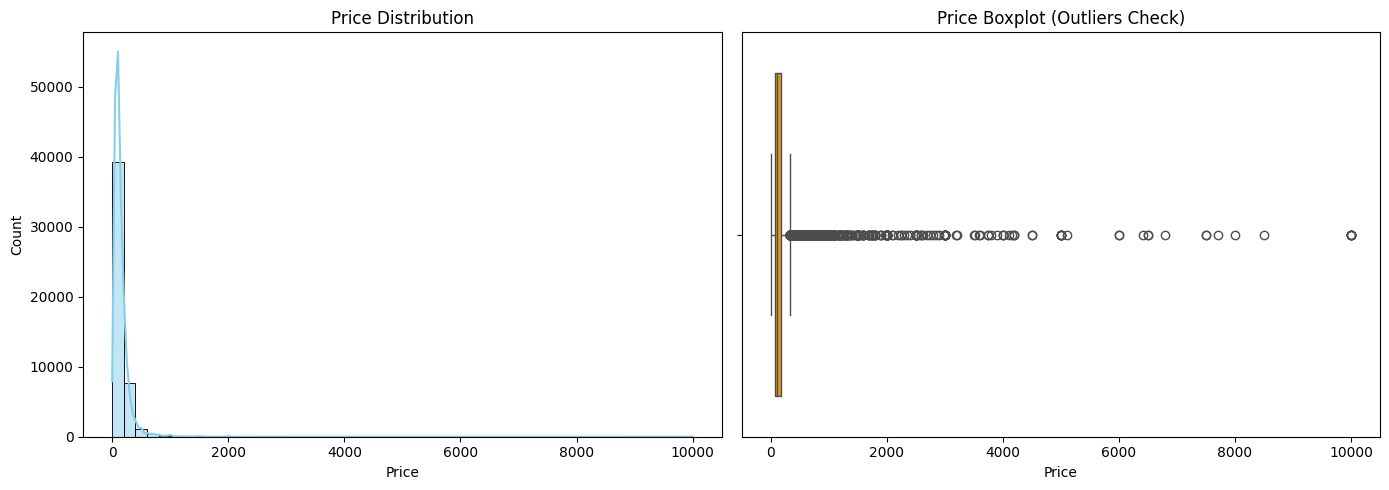

In [11]:
# Remove zeros or extreme outliers for better visualization (optional)
# df = df[df['price'] < 1000]  # Uncomment to remove high outliers if needed

plt.figure(figsize=(14, 5))

# 1. Histogram + KDE
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')

# 2. Boxplot for Outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'], color='orange')
plt.title('Price Boxplot (Outliers Check)')
plt.xlabel('Price')

plt.tight_layout()
plt.show()


<div style="background-color: #ffffff; border: 2px solid #add8e6; padding: 15px; border-radius: 10px; font-family: 'Segoe UI', sans-serif; line-height: 1.6; color: #333;">

  <h3 style="margin-top: 0;">📊 Price Distribution Insights</h3>

  <ul style="padding-left: 20px;">
    <li><strong>Histogram + KDE Plot:</strong>
      <ul>
        <li>Most listings are priced <strong>below $1000</strong>, with a huge spike in the <strong>$0–$200</strong> range 💸</li>
        <li>Distribution is <strong>right-skewed</strong> ➡️ — prices drop as they increase</li>
        <li>KDE curve peaks near lowest prices, confirming the skew</li>
      </ul>
    </li>

   <li><strong>Boxplot (Outlier Detection):</strong>
      <ul>
        <li>Very narrow IQR box near $0 → Most prices are very low 📉</li>
        <li>Numerous <strong>outliers</strong> beyond the whiskers 🚨</li>
        <li>Some listings priced up to <strong>$10,000</strong>, with clusters around <strong>$2000–$4000</strong></li>
      </ul>
    </li>
  </ul>

  <p style="margin-top: 10px;"><strong>🔍 Conclusion:</strong> Prices are <span style="color: #2e8b57;"><strong>heavily concentrated at the lower end</strong></span>, but there are many <span style="color: #b22222;"><strong>high-value outliers</strong></span> that create a long right tail in the distribution.</p>

</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
   Minimum Nights Distribution:
</h4>

In [12]:
import numpy as np

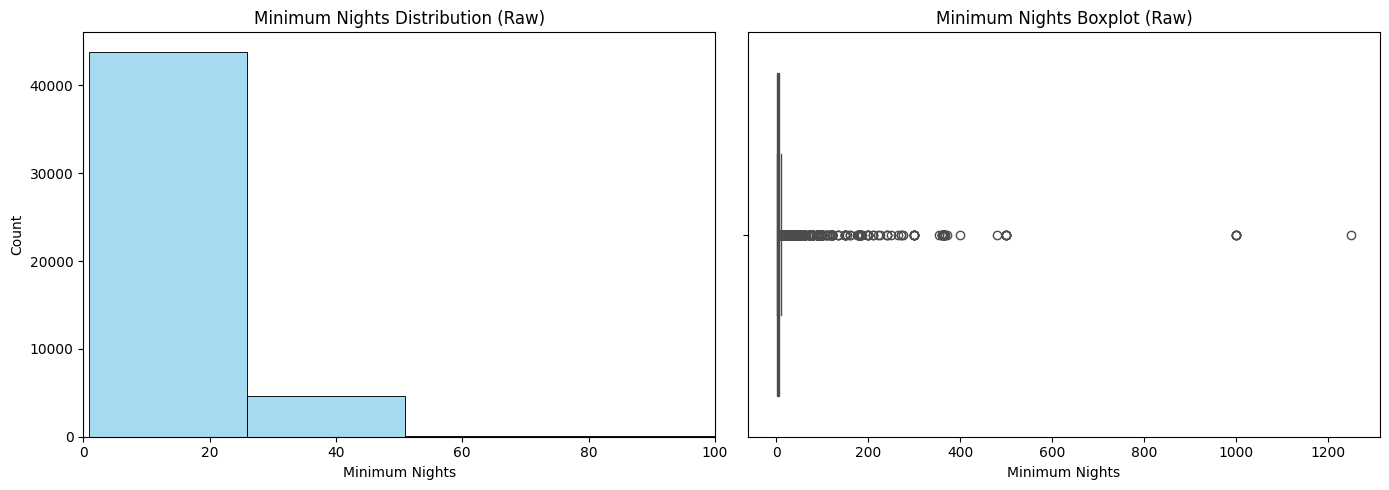

In [13]:
plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['minimum_nights'], bins=50, kde=False, color='skyblue')
plt.title('Minimum Nights Distribution (Raw)')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.xlim(0, 100)  # Optional: Focus on typical range

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['minimum_nights'], color='orange')
plt.title('Minimum Nights Boxplot (Raw)')
plt.xlabel('Minimum Nights')

plt.tight_layout()
plt.show()


<div style="background-color: #ffffff; border: 2px solid #ddd; padding: 15px; border-radius: 10px; font-family: 'Segoe UI', sans-serif; line-height: 1.6; color: #333;">

  <h3 style="margin-top: 0;">🛌 Minimum Nights Distribution</h3>

  <ul style="padding-left: 20px;">
    <li><strong>Histogram (Left):</strong>
      <ul>
        <li>🔹 Majority of listings require <strong>0–25 nights</strong> — over <strong>40,000 listings</strong></li>
        <li>🔹 Listings requiring <strong>25–50 nights</strong> drop to ~<strong>5,000</strong></li>
        <li>🔹 After 50 nights, listings become rare 📉</li>
      </ul>
    </li>

   <li><strong>Boxplot (Right):</strong>
      <ul>
        <li>📦 IQR box is <strong>very narrow and near 0</strong> → most data is clustered at low values</li>
        <li>➖ Median also lies close to 0</li>
        <li>🚨 Numerous <strong>outliers</strong> far right → some require up to <strong>1200+ nights</strong></li>
        <li>📍 Common outlier range: <strong>100–400 nights</strong></li>
      </ul>
    </li>
  </ul>

  <p style="margin-top: 10px;"><strong>📌 Insight:</strong> Most listings have a <span style="color: #2e8b57;"><strong>low minimum night requirement</strong></span>, but there are many <span style="color: #b22222;"><strong>extreme outliers</strong></span> with unusually high requirements.</p>

</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
   number_of_reviews Distribution:
</h4>

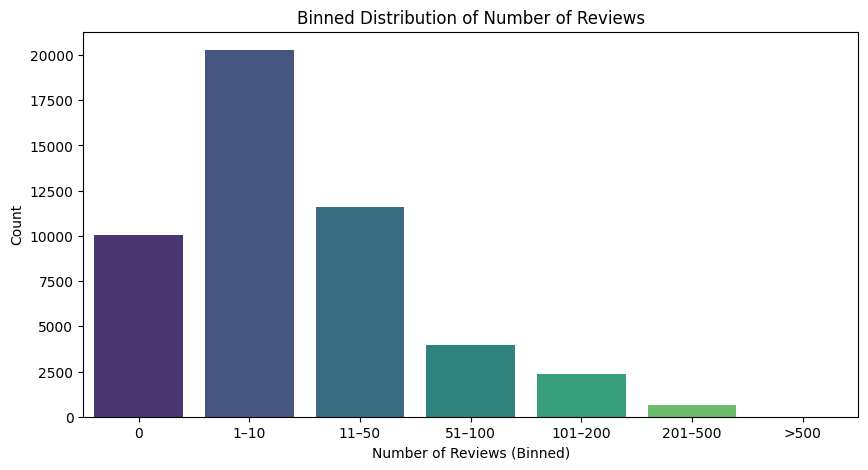

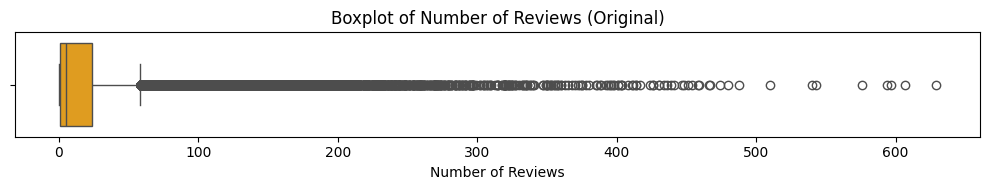

In [14]:
# Step 1: Define bins and labels
bins = [-1, 0, 10, 50, 100, 200, 500, df['number_of_reviews'].max()]
labels = ['0', '1–10', '11–50', '51–100', '101–200', '201–500', '>500']

# Step 2: Create a new column for binned reviews
df['reviews_bin'] = pd.cut(df['number_of_reviews'], bins=bins, labels=labels)

# Step 3: Plot the count of each bin
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='reviews_bin',hue='reviews_bin',legend=False, palette='viridis')
plt.title('Binned Distribution of Number of Reviews')
plt.xlabel('Number of Reviews (Binned)')
plt.ylabel('Count')


plt.figure(figsize=(10, 2))
sns.boxplot(x=df['number_of_reviews'], color='orange')
plt.title('Boxplot of Number of Reviews (Original)')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.show()



<div style="background: #fff; border: 1.5px solid #ccc; border-left: 6px solid #4a90e2; border-radius: 8px; padding: 18px; font-family: 'Segoe UI', sans-serif; color: #333; box-shadow: 1px 1px 5px rgba(0,0,0,0.05);">

  <h3 style="margin-top: 0;">📝 Distribution of Number of Reviews</h3>

  <div style="margin-bottom: 10px;">
    <span style="font-weight: 600; color: #4a90e2;">📊 Histogram:</span>
    <ul style="margin: 6px 0 12px 18px;">
      <li>Most listings have <strong>0–10 reviews</strong> ➜ over <strong>30,000 listings</strong>.</li>
      <li>Count rapidly declines as reviews increase.</li>
      <li>Distribution shows a <strong>long right tail</strong> (right-skewed).</li>
    </ul>
  </div>

  <div style="margin-bottom: 10px;">
    <span style="font-weight: 600; color: #4a90e2;">📦 Boxplot:</span>
    <ul style="margin: 6px 0 12px 18px;">
      <li>IQR box is <strong>narrow & near 0</strong> → most listings have very few reviews.</li>
      <li><strong>Median</strong> is also close to 0.</li>
      <li>Multiple <strong>outliers</strong> beyond <strong>600 reviews</strong>.</li>
    </ul>
  </div>

  <p style="margin: 0;"><strong>🔍 Insight:</strong> Listings are <span style="color: green;"><strong>concentrated at low reviews</strong></span>, but there are several <span style="color: red;"><strong>high-review outliers</strong></span> that skew the distribution.</p>

</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
   review_per_month Distribution:
</h4>

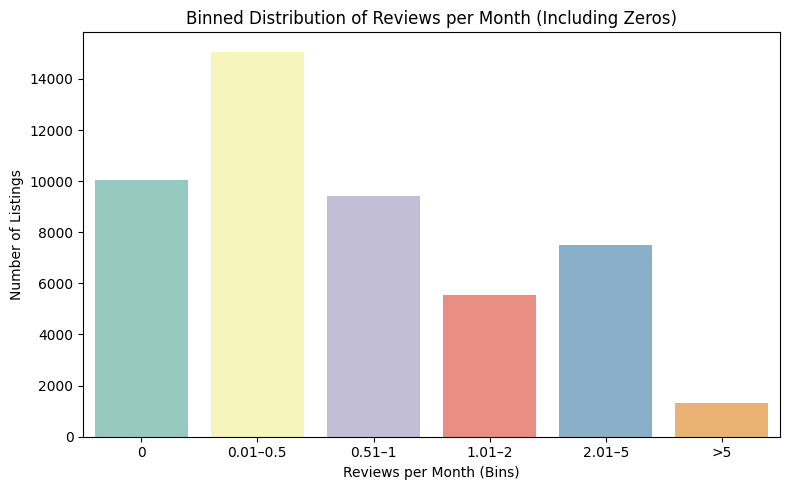

In [15]:
# Include zero as its own bin
df['review_bin'] = pd.cut(df['reviews_per_month'], bins=[-0.01, 0, 0.5, 1, 2, 5, df['reviews_per_month'].max()],
                          labels=['0', '0.01–0.5', '0.51–1', '1.01–2', '2.01–5', '>5'])

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='review_bin',hue='review_bin',legend=False, palette='Set3')
plt.title('Binned Distribution of Reviews per Month (Including Zeros)')
plt.xlabel('Reviews per Month (Bins)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


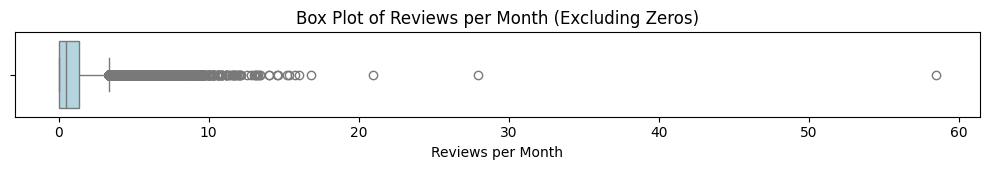

In [16]:
plt.figure(figsize=(10, 1.8))
sns.boxplot(x=df['reviews_per_month'], color='lightblue')
plt.title('Box Plot of Reviews per Month (Excluding Zeros)')
plt.xlabel('Reviews per Month')
plt.tight_layout()
plt.show()


<div style="background: #fff; border: 1.5px solid #ccc; border-left: 6px solid #f39c12; border-radius: 8px; padding: 18px; font-family: 'Segoe UI', sans-serif; color: #333; box-shadow: 1px 1px 5px rgba(0,0,0,0.05);">

  <h3 style="margin-top: 0;">📈 Reviews per Month Distribution</h3>

  <div style="margin-bottom: 10px;">
    <span style="font-weight: 600; color: #f39c12;">📊 Binned Bar Chart (Including Zeros):</span>
    <ul style="margin: 6px 0 12px 18px;">
      <li><strong>10,000+ listings</strong> have <strong>0 reviews/month</strong></li>
      <li><strong>15,000</strong> listings: <strong>0.01–0.5 reviews/month</strong></li>
      <li>Others spread across higher bins, with <strong>1,300+</strong> getting <strong>> 5 reviews/month</strong></li>
    </ul>
  </div>

  <div style="margin-bottom: 10px;">
    <span style="font-weight: 600; color: #f39c12;">📦 Boxplot (Excluding Zeros):</span>
    <ul style="margin: 6px 0 12px 18px;">
      <li>Majority of listings get <strong>very few reviews/month</strong></li>
      <li><strong>Median is low</strong>; box is tight near 0</li>
      <li>🚨 Outliers reach up to <strong>60 reviews/month</strong></li>
    </ul>
  </div>

  <p style="margin: 0;"><strong>🔍 Insight:</strong> Most listings get <span style="color: green;"><strong>low or no monthly reviews</strong></span>, but a few <span style="color: #b22222;"><strong>high performers</strong></span> receive consistent activity.</p>

</div>



<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
calculated_host_listings_count Distribution:</h4>


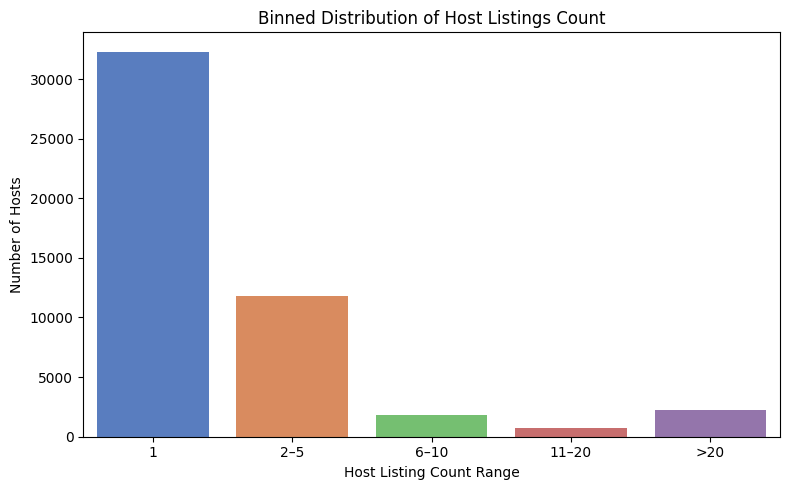

In [17]:
bins = [0, 1, 5, 10, 20, df['calculated_host_listings_count'].max()]
labels = ['1', '2–5', '6–10', '11–20', '>20']

df['host_listing_bins'] = pd.cut(df['calculated_host_listings_count'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='host_listing_bins',hue='host_listing_bins',legend=False, palette='muted')
plt.title('Binned Distribution of Host Listings Count')
plt.xlabel('Host Listing Count Range')
plt.ylabel('Number of Hosts')
plt.tight_layout()
plt.show()


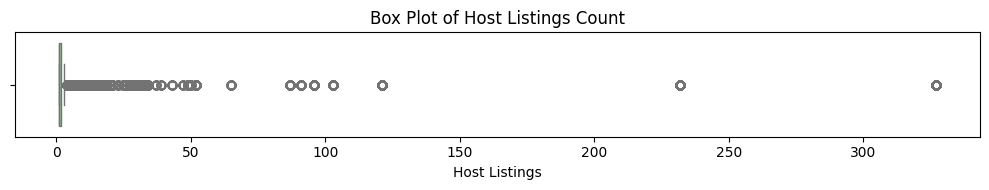

In [18]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['calculated_host_listings_count'], color='lightgreen')
plt.title('Box Plot of Host Listings Count')
plt.xlabel('Host Listings')
plt.tight_layout()
plt.show()


<div style="background: #fff; border: 1.5px solid #ccc; border-left: 6px solid #27ae60; border-radius: 8px; padding: 18px; font-family: 'Segoe UI', sans-serif; color: #333; box-shadow: 1px 1px 5px rgba(0,0,0,0.05);">

  <h3 style="margin-top: 0;">🏘️ Host Listings Count Distribution</h3>

  <div style="margin-bottom: 10px;">
    <span style="font-weight: 600; color: #27ae60;">📊 Binned Bar Chart:</span>
    <ul style="margin: 6px 0 12px 18px;">
      <li><strong>32,000+ hosts</strong> have <strong>only 1 listing</strong> ➜ Mostly individual hosts</li>
      <li><strong>12,000</strong> hosts have <strong>2–5 listings</strong></li>
      <li>Smaller groups: <strong>1,700</strong> (6–10), <strong>500</strong> (11–20), and <strong>2,000</strong> with <strong>> 20 listings</strong></li>
      <li>📦 Indicates presence of <strong>professional property managers</strong></li>
    </ul>
  </div>

  <div style="margin-bottom: 10px;">
    <span style="font-weight: 600; color: #27ae60;">📦 Boxplot Overview:</span>
    <ul style="margin: 6px 0 12px 18px;">
      <li>IQR box is <strong>tight & near 0</strong> → Most hosts manage very few listings</li>
      <li><strong>Median is low</strong>, reinforcing that 50% of hosts are small-scale</li>
      <li>🚨 Outliers go up to <strong>300+ listings</strong> ➜ Indicating high-volume professional hosts</li>
    </ul>
  </div>

  <p style="margin: 0;"><strong>🔍 Insight:</strong> Majority of hosts manage <span style="color: green;"><strong>only 1 or a few listings</strong></span>, but a small segment of <span style="color: #b22222;"><strong>professional operators</strong></span> hold large portfolios.</p>

</div>




<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
availability_365 Distribution:</h4>


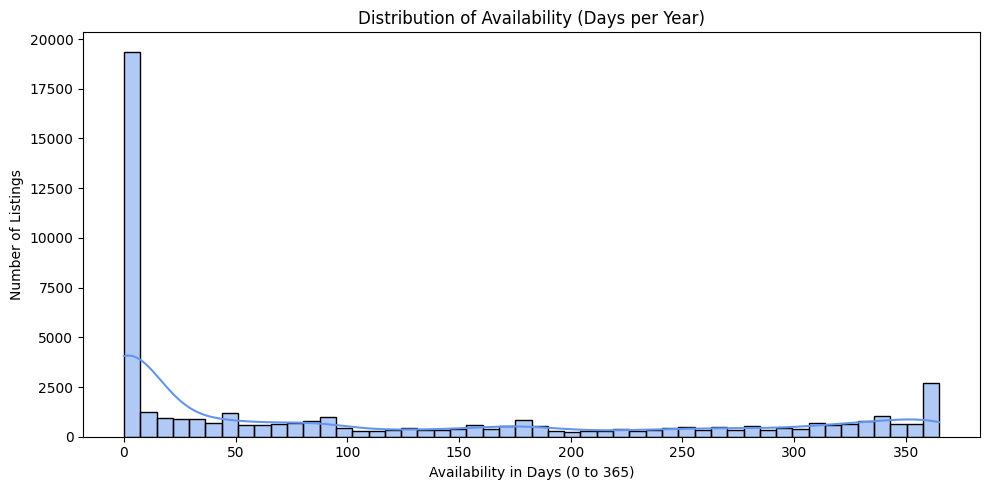

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['availability_365'], bins=50, kde=True, color='cornflowerblue')
plt.title('Distribution of Availability (Days per Year)')
plt.xlabel('Availability in Days (0 to 365)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


<div style="background: #fff; border: 1.5px solid #ccc; border-left: 6px solid #3498db; border-radius: 8px; padding: 18px; font-family: 'Segoe UI', sans-serif; color: #333; box-shadow: 1px 1px 5px rgba(0,0,0,0.05);">

  <h3 style="margin-top: 0;">📅 Availability Distribution (Days/Year)</h3>

  <div style="margin-bottom: 10px;">
    <span style="font-weight: 600; color: #3498db;">📊 Histogram Summary:</span>
    <ul style="margin: 6px 0 12px 18px;">
      <li>📌 <strong>19,000+ listings</strong> have <strong>0 days availability</strong> ➜ likely inactive or blocked</li>
      <li>📆 <strong>2,800+ listings</strong> are available for <strong>365 days</strong> (year-round)</li>
      <li>📉 Very few listings in between — most bins < <strong>2,000 listings</strong></li>
    </ul>
  </div>

  <p style="margin: 0;"><strong>🔍 Insight:</strong> A clear <span style="color: #e67e22;"><strong>bimodal pattern</strong></span>: listings are either <strong>never</strong> or <strong>always</strong> available — few have partial availability.</p>

</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
latitude & longitude Distributions:</h4>


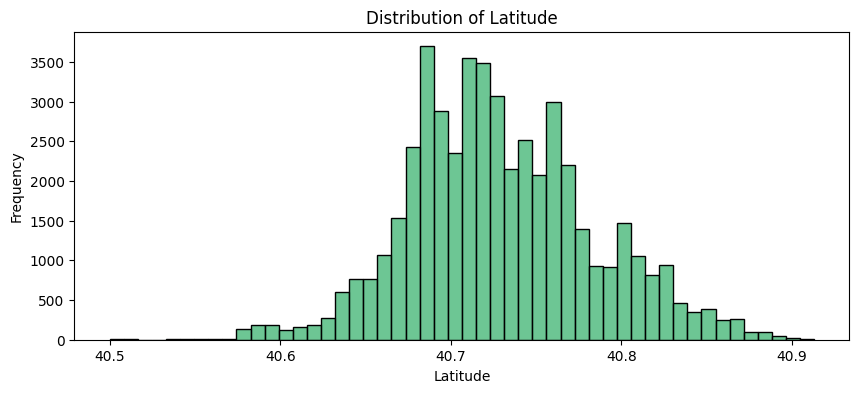

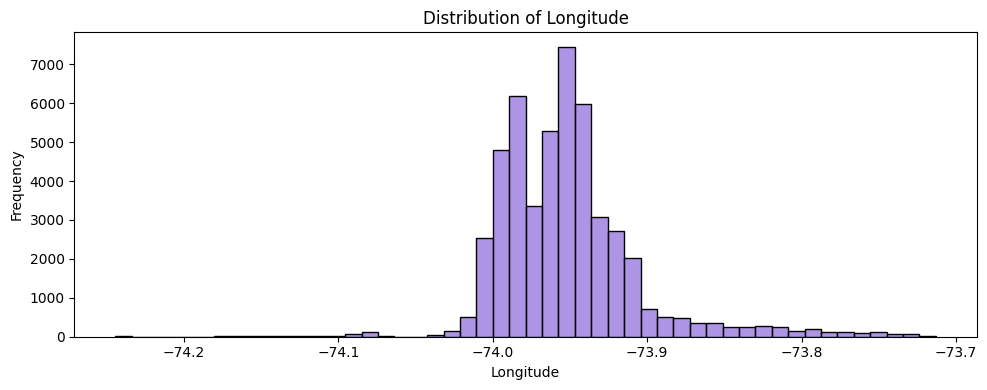

In [21]:
plt.figure(figsize=(10, 4))
sns.histplot(df['latitude'], bins=50, color='mediumseagreen')
plt.title('Distribution of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

plt.figure(figsize=(10, 4))
sns.histplot(df['longitude'], bins=50, color='mediumpurple')
plt.title('Distribution of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<div style="background: #fff; border: 1.5px solid #ccc; border-left: 6px solid #1abc9c; border-radius: 8px; padding: 18px; font-family: 'Segoe UI', sans-serif; color: #333; box-shadow: 1px 1px 5px rgba(0,0,0,0.05);">

  <h3 style="margin-top: 0;">📍 Latitude & Longitude Distribution</h3>

  <div style="margin-bottom: 10px;">
    <span style="font-weight: 600; color: #2ecc71;">🧭 Latitude Insights:</span>
    <ul style="margin: 6px 0 12px 18px;">
      <li>🌐 Listings mainly between <strong>40.67–40.78°</strong> latitude</li>
      <li>📌 Peak: <strong>40.69–40.71°</strong> → <strong>3,500+ listings</strong></li>
      <li>📉 Drops sharply <strong>below 40.55°</strong> and <strong>above 40.9°</strong></li>
    </ul>
  </div>

  <div style="margin-bottom: 10px;">
    <span style="font-weight: 600; color: #1abc9c;">🗺️ Longitude Insights:</span>
    <ul style="margin: 6px 0 12px 18px;">
      <li>🌐 Listings mostly between <strong>-74.0 to -73.9°</strong> longitude</li>
      <li>📌 Peak: <strong>-73.98 to -73.96°</strong> → <strong>7,000+ listings</strong></li>
      <li>📉 Few listings outside <strong>-74.1</strong> and <strong>-73.8°</strong></li>
    </ul>
  </div>

  <p style="margin: 0;"><strong>📌 Conclusion:</strong> Both distributions confirm a <span style="color: #e67e22;"><strong>highly concentrated geographic zone</strong></span>, typical of a dense metropolitan area like NYC.</p>

</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
seasonal_availability Distribution:
</h4>

In [25]:
def categorize_availability(days):
    if days <= 90:
        return 'Low'
    elif days <= 270:
        return 'Medium'
    else:
        return 'High'

df['seasonal_availability'] = df['availability_365'].apply(categorize_availability)


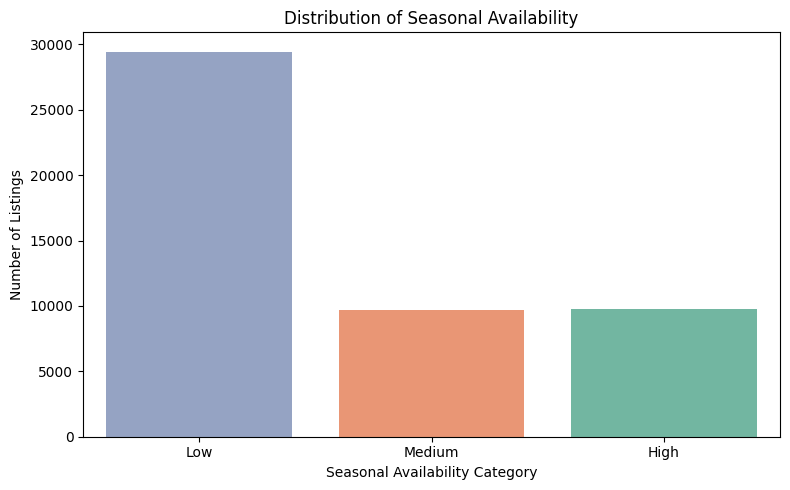

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='seasonal_availability', order=['Low', 'Medium', 'High'],hue='seasonal_availability',legend=False, palette='Set2')
plt.title('Distribution of Seasonal Availability')
plt.xlabel('Seasonal Availability Category')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


<div style="border:2px solid #888; border-radius:10px; padding:15px; font-family:Arial, sans-serif; background-color:#ffffff; color:#222;">
  <h3 style="color:#000000;">📊 Seasonal Availability Summary</h3>
  <ul style="padding-left:20px;">
    <li>🟢 <b>Low:</b> ~29,500 listings (most common)</li>
    <li>🟡 <b>Medium:</b> ~9,700 listings</li>
    <li>🔴 <b>High:</b> ~9,700 listings</li>
  </ul>
  <div style="margin-top:10px; background:#f0f8ff; border-left:4px solid #007acc; padding:10px;">
    ✅ <b>Insight:</b> Majority of listings are available year-round.
  </div>
</div>


<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #fefefe; color: #4A4A4A; line-height: 1.7; padding: 20px; border-radius: 8px; box-shadow: 0 4px 8px rgba(0,0,0,0.05); margin-top: 40px;">

  <h1 style="font-size: 2.6em; color: #FF5733; border-bottom: 4px solid #C70039; padding-bottom: 15px; margin-bottom: 30px; font-weight: 700; text-shadow: 1px 1px 2px rgba(0,0,0,0.1);">
    4. Bivariate Analysis
  </h1>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
room_type vs. price / price_per_night</h4>

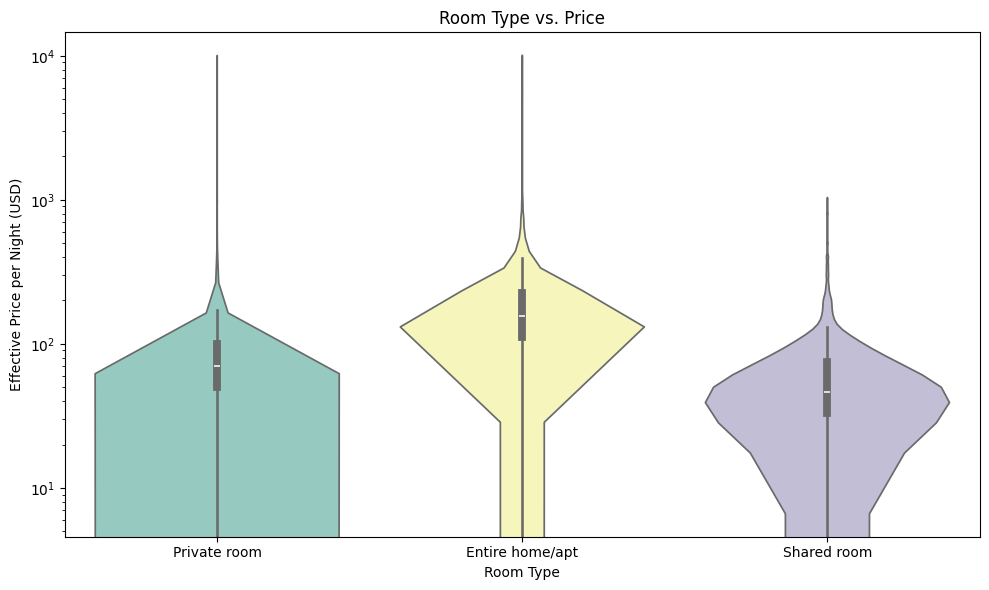

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='room_type', y='price',hue='room_type',legend=False, palette='Set3', inner='box')
plt.title('Room Type vs. Price')
plt.xlabel('Room Type')
plt.ylabel('Effective Price per Night (USD)')
plt.yscale('log')  # Optional, if skewed
plt.tight_layout()
plt.show()


<div style="border:2px solid #aaa; border-radius:10px; padding:15px; font-family:Arial,sans-serif; background:#ffffff; color:#222;">
  <h3 style="color:#000000;">🎻 Room Type vs. Price (Violin Plot)</h3>
  <p>💲 <b>Log scale Y-axis</b> shows price per night distribution for room types:</p>
  <ul style="padding-left:20px;">
    <li>🏠 <b>Entire home/apt:</b> Highest prices (~$100–$500), median ~$200–$250.</li>
    <li>🚪 <b>Private room:</b> ~$40–$200, median ~$80–$100.</li>
    <li>🛏️ <b>Shared room:</b> ~$20–$100, median ~$40–$50.</li>
  </ul>
  <div style="margin-top:10px; background:#f0f8ff; border-left:4px solid #007acc; padding:10px;">
    ⚠️ <b>Note:</b> All types show long tails with outliers up to ~$10,000/night.
  </div>
</div>


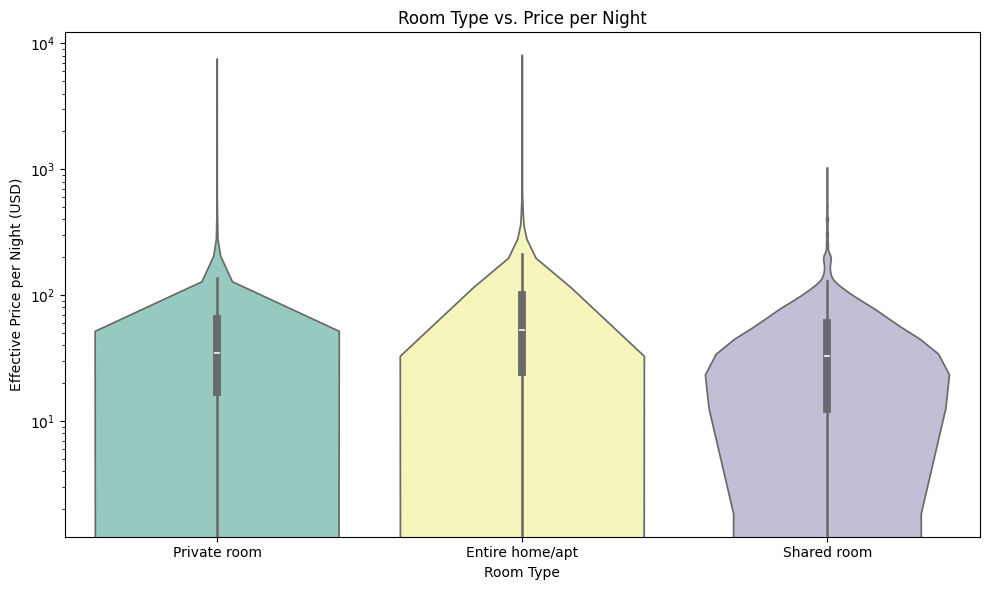

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='room_type', y='price_per_night', palette='Set3',hue='room_type',legend=False, inner='box')
plt.title('Room Type vs. Price per Night')
plt.xlabel('Room Type')
plt.ylabel('Effective Price per Night (USD)')
plt.yscale('log')  # Optional, if skewed
plt.tight_layout()
plt.show()


<div style="border:2px solid #ccc; border-radius:10px; padding:20px; background:#ffffff; font-family:Arial,sans-serif; color:#333;">
  <h2 style="color:#2c3e50;">🎻 Room Type vs. Price per Night (Violin Plot)</h2>
  <p>📊 This violin plot displays the distribution of <b>effective price per night (USD)</b> for different room types. The <b>y-axis</b> is on a <span style="color:#e67e22;"><b>logarithmic scale</b></span> for better visualization of price variation.</p>
  <hr style="border:1px solid #ccc;">

  <h3 style="color:#34495e;">🔍 <u>Key Observations by Room Type</u></h3>
  <ul style="line-height:1.8;">
    <li>🏠 <b>Entire home/apt:</b> Highest prices (~<b>$100–$500</b>), median ~<b>$200–$250</b>. Dense distribution in this mid-high range.</li>
    <li>🚪 <b>Private room:</b> Lower than entire homes, higher than shared (~<b>$40–$200</b>), median ~<b>$80–$100</b>. Concentrated in the lower end.</li>
    <li>🛏️ <b>Shared room:</b> Lowest prices (~<b>$20–$100</b>), median ~<b>$40–$50</b>. Heavily skewed towards budget range.</li>
  </ul>

  <hr style="border:1px solid #ccc;">

  <h3 style="color:#34495e;">📈 <u>Overall Price Distribution</u></h3>
  <p>💡 All room types have a <b>long upper tail</b> extending up to <b>$10,000/night</b>, indicating a small number of <b>high-priced outliers</b>. These outliers are rare but present across all categories, as seen by the tapering top of each violin plot.</p>
</div>



<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #ecf808ff; margin-top:20px; margin-bottom:10px;">
neighbourhood_group vs. price / price_per_night</h4>

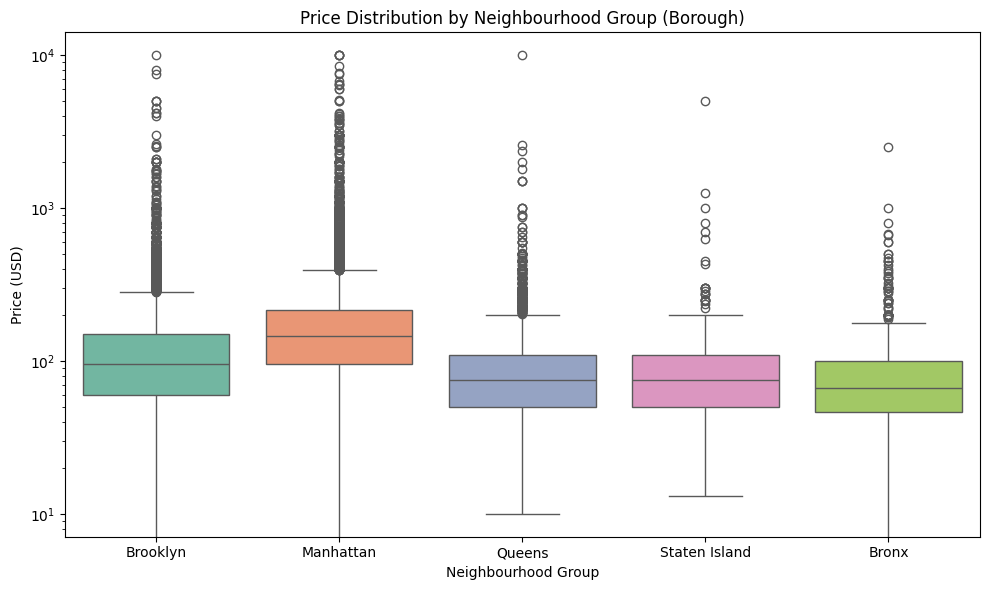

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price',hue='neighbourhood_group',legend=False, palette='Set2')
plt.title('Price Distribution by Neighbourhood Group (Borough)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price (USD)')
plt.yscale('log')  # Handles skewed distribution and outliers
plt.tight_layout()
plt.show()
